**UNCOMMENT ANY COMMENTED CODE AS REQUIRED**

In [1]:
!pip install matplotlib
!pip install seaborn
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
import tensorflow as tf

gpus = tf.config.list_physical_devices('GPU')
if gpus:
    for i, gpu in enumerate(gpus):
        details = tf.config.experimental.get_device_details(gpu)
        print(f"GPU {i}: {details.get('device_name', 'Unknown GPU')}")
else:
    print("No GPU detected")


GPU 0: NVIDIA GeForce RTX 2050


In [3]:

# Importing Data
URL = 'energy_readings.csv'
df = pd.read_csv(URL)

In [4]:
print("Return first 5 rows.","\n")
df.head()
print("Return last 5 rows.","\n")
df.tail()

Return first 5 rows. 

Return last 5 rows. 



,id,device_id,timestamp,voltage,current,power,energy,frequency,power_factor
167614,167615,2,2025-03-13 23:55:00,249.5,9.21,2297.90,66.49,50.1,0.93
167615,167616,3,2025-03-13 23:55:00,224.0,8.43,1888.32,86.29,50.1,0.92
167616,167617,1,2025-03-14 00:00:00,226.3,7.60,1719.88,24.43,50.1,1.00
167617,167618,2,2025-03-14 00:00:00,218.4,0.92,200.93,8.33,50.0,0.91
167618,167619,3,2025-03-14 00:00:00,244.3,6.97,1702.77,48.64,50.0,0.93


In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167619 entries, 0 to 167618
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            167619 non-null  int64  
 1   device_id     167619 non-null  int64  
 2   timestamp     167619 non-null  object 
 3   voltage       167619 non-null  float64
 4   current       167619 non-null  float64
 5   power         167619 non-null  float64
 6   energy        167619 non-null  float64
 7   frequency     167619 non-null  float64
 8   power_factor  167619 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 11.5+ MB


In [6]:
#print("Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.", "\n")
print(df.describe(), "\n")

                  id      device_id        voltage        current  \
count  167619.000000  167619.000000  167619.000000  167619.000000   
mean    83810.000000       2.000000     229.993873       5.248399   
std     48387.581723       0.816499      11.543539       2.745548   
min         1.000000       1.000000     210.000000       0.500000   
25%     41905.500000       1.000000     220.000000       2.880000   
50%     83810.000000       2.000000     230.000000       5.250000   
75%    125714.500000       3.000000     240.000000       7.640000   
max    167619.000000       3.000000     250.000000      10.000000   

               power         energy      frequency   power_factor  
count  167619.000000  167619.000000  167619.000000  167619.000000  
mean     1206.957978      36.145983      50.000168       0.950101  
std       634.876690      24.651718       0.122511       0.029180  
min       105.150000       1.150000      49.800000       0.900000  
25%       660.625000      16.330000   

In [7]:
# del df["Start time UTC"]
# del df["End time UTC"]
# del df["Start time UTC+03:00"]
# df.rename(columns={"End time UTC+03:00":"DateTime","Electricity consumption in India":"Consumption"},inplace=True)
# print(df.head(5))
del df['current']
del df['voltage']
del df['power_factor']
del df['frequency']
del df['energy']
# Rename timestamp column to DateTime for consistency
df.rename(columns={"timestamp": "DateTime", "power": "Power"}, inplace=True)

# Display the first rows to verify changes
print(df.head(5))

   id  device_id             DateTime    Power
0   1          1  2024-09-01 00:00:00   461.45
1   2          2  2024-09-01 00:00:00   982.63
2   3          3  2024-09-01 00:00:00   969.87
3   4          1  2024-09-01 00:05:00   491.71
4   5          2  2024-09-01 00:05:00  1478.25


In [8]:
# dataset = df
# dataset["Month"] = pd.to_datetime(df["DateTime"]).dt.month
# dataset["Year"] = pd.to_datetime(df["DateTime"]).dt.year
# dataset["Date"] = pd.to_datetime(df["DateTime"]).dt.date
# dataset["Time"] = pd.to_datetime(df["DateTime"]).dt.time
# dataset["Week"] = pd.to_datetime(df["DateTime"]).dt.isocalendar().week
# dataset["Day"] = pd.to_datetime(df["DateTime"]).dt.day_name()
# dataset = df.set_index("DateTime")
# dataset.index = pd.to_datetime(dataset.index)

# Create a copy of the dataframe to work with
dataset = df.copy()

# Extract date and time components from the DateTime column
# DateTime is already in the correct format (2025-03-13 23:55:00)
dataset["Month"] = pd.to_datetime(dataset["DateTime"]).dt.month
dataset["Year"] = pd.to_datetime(dataset["DateTime"]).dt.year
dataset["Date"] = pd.to_datetime(dataset["DateTime"]).dt.date
dataset["Time"] = pd.to_datetime(dataset["DateTime"]).dt.time
dataset["Week"] = pd.to_datetime(dataset["DateTime"]).dt.isocalendar().week
dataset["Day"] = pd.to_datetime(dataset["DateTime"]).dt.day_name()

# Set DateTime as index
dataset = dataset.set_index("DateTime")
dataset.index = pd.to_datetime(dataset.index)

# Display the result
print(dataset.head())

                     id  device_id    Power  Month  Year        Date  \
DateTime                                                               
2024-09-01 00:00:00   1          1   461.45      9  2024  2024-09-01   
2024-09-01 00:00:00   2          2   982.63      9  2024  2024-09-01   
2024-09-01 00:00:00   3          3   969.87      9  2024  2024-09-01   
2024-09-01 00:05:00   4          1   491.71      9  2024  2024-09-01   
2024-09-01 00:05:00   5          2  1478.25      9  2024  2024-09-01   

                         Time  Week     Day  
DateTime                                     
2024-09-01 00:00:00  00:00:00    35  Sunday  
2024-09-01 00:00:00  00:00:00    35  Sunday  
2024-09-01 00:00:00  00:00:00    35  Sunday  
2024-09-01 00:05:00  00:05:00    35  Sunday  
2024-09-01 00:05:00  00:05:00    35  Sunday  


In [9]:
dataset.head()


print("")
print("Total Number of Years: ", dataset.Year.nunique() )
print(dataset.Year.unique())


Total Number of Years:  2
[2024 2025]


In [10]:
dataset = dataset[71:-121]
dataset.tail()

,id,device_id,Power,Month,Year,Date,Time,Week,Day
DateTime,,,,,,,,,
2025-03-13 20:35:00,167494,1,328.65,3,2025,2025-03-13,20:35:00,11,Thursday
2025-03-13 20:35:00,167495,2,1695.40,3,2025,2025-03-13,20:35:00,11,Thursday
2025-03-13 20:35:00,167496,3,1102.35,3,2025,2025-03-13,20:35:00,11,Thursday
2025-03-13 20:40:00,167497,1,805.63,3,2025,2025-03-13,20:40:00,11,Thursday
2025-03-13 20:40:00,167498,2,193.08,3,2025,2025-03-13,20:40:00,11,Thursday


In [ ]:
# # Energy Consumption Each Year
# from matplotlib import style

# fig = plt.figure(figsize = (30,30))

# ax1 = fig.add_subplot(611)
# ax2 = fig.add_subplot(612)
# ax3 = fig.add_subplot(613)
# ax4 = fig.add_subplot(614)
# ax5 = fig.add_subplot(615)
# ax6 = fig.add_subplot(616)

# style.use("ggplot")

# y_2016 = dataset.loc["2016"]["Consumption"].to_list()
# x_2016 = dataset.loc["2016"]["Date"].to_list()
# ax1.plot(x_2016, y_2016, color= "blue", linewidth= 1.7)

# y_2017 = dataset.loc["2017"]["Consumption"].to_list()
# x_2017 = dataset.loc["2017"]["Date"].to_list()
# ax2.plot(x_2017, y_2017, color= "blue", linewidth= 1.7)

# y_2018 = dataset.loc["2018"]["Consumption"].to_list()
# x_2018 = dataset.loc["2018"]["Date"].to_list()
# ax3.plot(x_2018, y_2018, color= "blue", linewidth= 1.7)

# y_2019 = dataset.loc["2019"]["Consumption"].to_list()
# x_2019 = dataset.loc["2019"]["Date"].to_list()
# ax4.plot(x_2019, y_2019, color= "blue", linewidth= 1.7)

# y_2020 = dataset.loc["2020"]["Consumption"].to_list()
# x_2020 = dataset.loc["2020"]["Date"].to_list()
# ax5.plot(x_2020, y_2020, color= "blue", linewidth= 1.7)

# y_2021 = dataset.loc["2021"]["Consumption"].to_list()
# x_2021 = dataset.loc["2021"]["Date"].to_list()
# ax6.plot(x_2021, y_2021, color= "blue", linewidth= 1.7)

# plt.rcParams["figure.figsize"] = (30, 15)
# plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=2.5, wspace=0.4, hspace=0.4)
# plt.title("Energy Consumption")
# plt.xlabel("Date")
# plt.ylabel("Energy in MW")
# plt.grid(True, alpha=1)
# plt.legend()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14520\876473230.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Power"])


Text(0.5, 1.0, 'Energy Distribution')

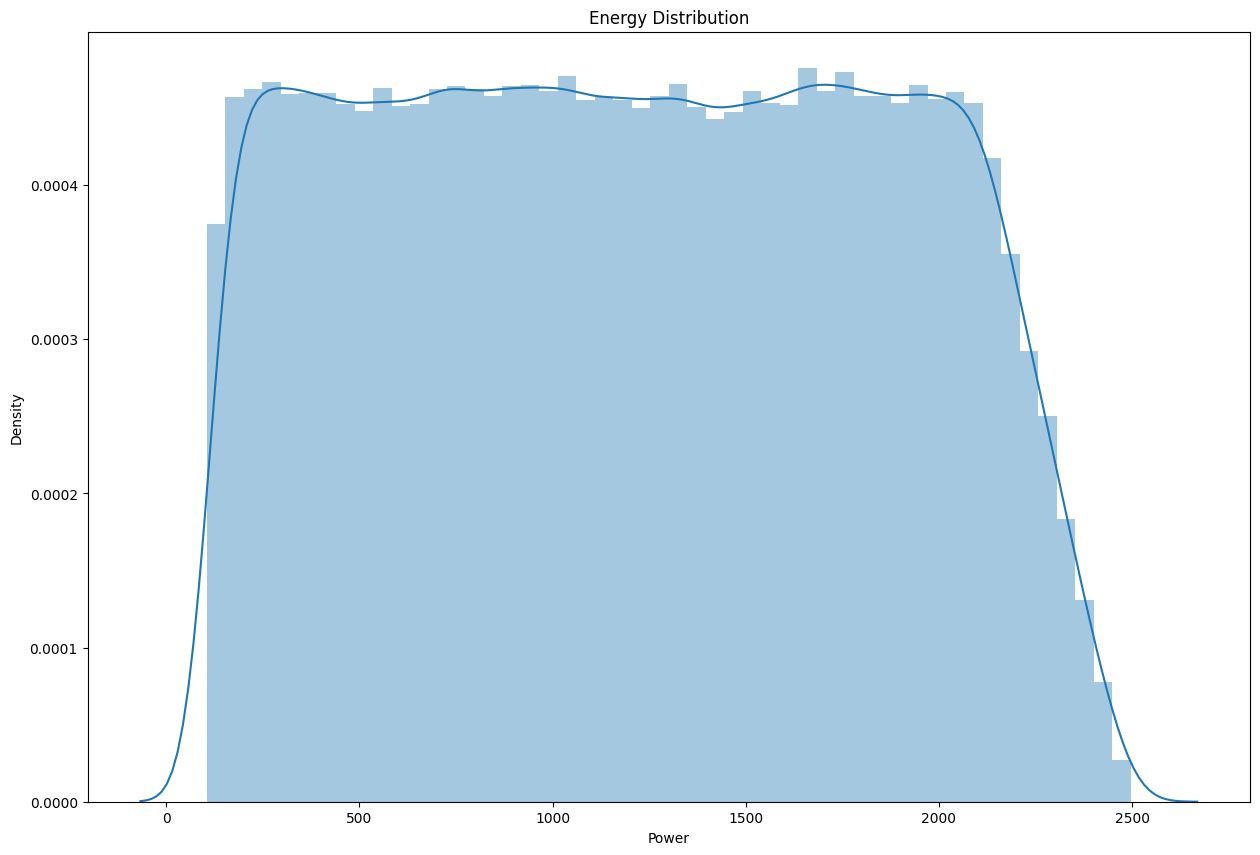

In [11]:
# Lets us see the Distribution off Energy Consumption so we have a idea about your Dataset a bit more
fig = plt.figure(figsize = (15,10))
sns.distplot(dataset["Power"])
plt.title("Energy Distribution")

**MODEL TRAINING**

In [56]:
# # Downsampling involves decreasing the time-frequency of the data
# # Downsapling the time-frequency from hours to days 
# newDataSet = dataset.resample("D").mean(numeric_only=True)

# Get the list of unique device IDs (should be 1, 2, and 3 based on your sample)
device_ids = dataset['device_id'].unique()

# Create a dictionary to store the downsampled data for each device
device_datasets = {}

# Perform downsampling for each device separately
for device_id in device_ids:
    # Filter data for this specific device
    device_data = dataset[dataset['device_id'] == device_id]
    
    # Resample the device data to daily frequency
    device_resampled = device_data.resample("h").mean(numeric_only=True)
    
    # Store in dictionary with device_id as the key
    device_datasets[device_id] = device_resampled



In [57]:
# Print shape of the original dataset
print("Original Dataset Shape:", dataset.shape)

# Print shapes for each device's downsampled data
for device_id in device_datasets:
    print(f"Device {device_id} Original Shape:", dataset[dataset['device_id'] == device_id].shape)
    print(f"Device {device_id} Downsampled Shape:", device_datasets[device_id].shape)


Original Dataset Shape: (167427, 9)
Device 3 Original Shape: (55809, 9)
Device 3 Downsampled Shape: (4652, 6)
Device 1 Original Shape: (55809, 9)
Device 1 Downsampled Shape: (4651, 6)
Device 2 Original Shape: (55809, 9)
Device 2 Downsampled Shape: (4651, 6)


In [58]:
# y = newDataSet["Consumption"]
# print(y[0])
# y.shape
# For a single device approach (e.g., device 1)
y_device1 = device_datasets[1]["Power"]  # or "energy" depending on what you want to predict
print(f"First value for device 1: {y_device1.iloc[0]}")
print(f"Shape of target variable: {y_device1.shape}")

# For device 2
y_device2 = device_datasets[2]["Power"]
print(f"First value for device 2: {y_device2.iloc[0]}")
print(f"Shape of target variable: {y_device2.shape}")

# For device 3
y_device3 = device_datasets[3]["Power"]
print(f"First value for device 3: {y_device3.iloc[0]}")
print(f"Shape of target variable: {y_device3.shape}")

First value for device 1: 1115.9266666666665
Shape of target variable: (4651,)
First value for device 2: 1058.9016666666666
Shape of target variable: (4651,)
First value for device 3: 1033.67
Shape of target variable: (4652,)


In [59]:
# # Normalize data before model fitting
# # it will boost the performance( in neural networks) + transform
# !pip install scikit-learn
# from sklearn.preprocessing import MinMaxScaler
# # scale of the output and input inthe range 0-1 to match the scale of the layer of LSTM
# scaler = MinMaxScaler(feature_range = (0,1)) 
# # reshape: convert the univariate 1D array into 2D
# y = scaler.fit_transform(np.array(y).reshape(-1,1))
# print("Normalizing data before model fitting")
# print(y[:10])


# Normalize data before model fitting
# it will boost the performance in neural networks
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Create scalers for each device dataset
scaler1 = MinMaxScaler(feature_range=(0,1))
scaler2 = MinMaxScaler(feature_range=(0,1))
scaler3 = MinMaxScaler(feature_range=(0,1))

# Normalize data for device 1
y_device1_scaled = scaler1.fit_transform(np.array(y_device1).reshape(-1,1))
print("Device 1 - Normalized data (first 10 values):")
print(y_device1_scaled[:10])

# Normalize data for device 2
y_device2_scaled = scaler2.fit_transform(np.array(y_device2).reshape(-1,1))
print("\nDevice 2 - Normalized data (first 10 values):")
print(y_device2_scaled[:10])

# Normalize data for device 3
y_device3_scaled = scaler3.fit_transform(np.array(y_device3).reshape(-1,1))
print("\nDevice 3 - Normalized data (first 10 values):")
print(y_device3_scaled[:10])

Device 1 - Normalized data (first 10 values):
[[0.40779026]
 [0.34882957]
 [0.55405353]
 [0.49352878]
 [0.57575159]
 [0.53989661]
 [0.22589323]
 [0.2147803 ]
 [0.46518129]
 [0.62165332]]

Device 2 - Normalized data (first 10 values):
[[0.38186105]
 [0.75288444]
 [0.55444455]
 [0.74013977]
 [0.48840243]
 [0.79805521]
 [0.58411811]
 [0.57528567]
 [0.58821733]
 [0.53193125]]

Device 3 - Normalized data (first 10 values):
[[0.3457204 ]
 [0.36213209]
 [0.41760193]
 [0.61900304]
 [0.46522228]
 [0.61090824]
 [0.39063132]
 [0.50850071]
 [0.65345071]
 [0.49513601]]


In [60]:
# training_size = int(len(y)*0.80)
# test_size = len(y)- training_size
# val_size = int(training_size*0.20)
# train_data , test_data , val_data = y[0:training_size-val_size,:] , y[training_size:len(y),:1], y[len(y)-test_size-val_size:len(y)-test_size,:1]

# Device 1
training_size1 = int(len(y_device1_scaled)*0.80)
test_size1 = len(y_device1_scaled) - training_size1
val_size1 = int(training_size1*0.20)
train_data1, test_data1, val_data1 = y_device1_scaled[0:training_size1-val_size1,:], y_device1_scaled[training_size1:len(y_device1_scaled),:1], y_device1_scaled[training_size1-val_size1:training_size1,:1]
print(f"Device 1 - Train: {train_data1.shape}, Test: {test_data1.shape}, Val: {val_data1.shape}")

# Device 2
training_size2 = int(len(y_device2_scaled)*0.80)
test_size2 = len(y_device2_scaled) - training_size2
val_size2 = int(training_size2*0.20)
train_data2, test_data2, val_data2 = y_device2_scaled[0:training_size2-val_size2,:], y_device2_scaled[training_size2:len(y_device2_scaled),:1], y_device2_scaled[training_size2-val_size2:training_size2,:1]
print(f"Device 2 - Train: {train_data2.shape}, Test: {test_data2.shape}, Val: {val_data2.shape}")

# Device 3
training_size3 = int(len(y_device3_scaled)*0.80)
test_size3 = len(y_device3_scaled) - training_size3
val_size3 = int(training_size3*0.20)
train_data3, test_data3, val_data3 = y_device3_scaled[0:training_size3-val_size3,:], y_device3_scaled[training_size3:len(y_device3_scaled),:1], y_device3_scaled[training_size3-val_size3:training_size3,:1]
print(f"Device 3 - Train: {train_data3.shape}, Test: {test_data3.shape}, Val: {val_data3.shape}")

Device 1 - Train: (2976, 1), Test: (931, 1), Val: (744, 1)
Device 2 - Train: (2976, 1), Test: (931, 1), Val: (744, 1)
Device 3 - Train: (2977, 1), Test: (931, 1), Val: (744, 1)


In [61]:
# # building input variable
# def create_dataset(dataset, time_step = 1):
#   dataX, dataY = [] , []
#   for i in range(len(dataset)-time_step-1):
#     a = dataset[i:(i+time_step),0]
#     dataX.append(a)
#     dataY.append(dataset[i + time_step,0])
#   return np.array(dataX), np.array(dataY)

# time_step = 100 
# X_train, y_train = create_dataset(train_data, time_step)
# X_test, ytest = create_dataset(test_data, time_step)
# X_val, yval = create_dataset(val_data, time_step)

# # reshape train and input-output pairs
# X_train = X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
# X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)
# X_val = X_val.reshape(X_val.shape[0], X_val.shape[1],1)

# print("X_train shape: ", X_train.shape)
# print("X_test shape: ",X_test.shape)
# print("X_val shape: ",X_val.shape)


# Building input variables
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i + time_step,0])
    return np.array(dataX), np.array(dataY)

time_step = 100

# Device 1
X_train1, y_train1 = create_dataset(train_data1, time_step)
X_test1, ytest1 = create_dataset(test_data1, time_step)
X_val1, yval1 = create_dataset(val_data1, time_step)

# Device 2
X_train2, y_train2 = create_dataset(train_data2, time_step)
X_test2, ytest2 = create_dataset(test_data2, time_step)
X_val2, yval2 = create_dataset(val_data2, time_step)

# Device 3
X_train3, y_train3 = create_dataset(train_data3, time_step)
X_test3, ytest3 = create_dataset(test_data3, time_step)
X_val3, yval3 = create_dataset(val_data3, time_step)

# Reshape input for LSTM (samples, time steps, features)
X_train1 = X_train1.reshape(X_train1.shape[0], X_train1.shape[1], 1)
X_test1 = X_test1.reshape(X_test1.shape[0], X_test1.shape[1], 1)
X_val1 = X_val1.reshape(X_val1.shape[0], X_val1.shape[1], 1)

X_train2 = X_train2.reshape(X_train2.shape[0], X_train2.shape[1], 1)
X_test2 = X_test2.reshape(X_test2.shape[0], X_test2.shape[1], 1)
X_val2 = X_val2.reshape(X_val2.shape[0], X_val2.shape[1], 1)

X_train3 = X_train3.reshape(X_train3.shape[0], X_train3.shape[1], 1)
X_test3 = X_test3.reshape(X_test3.shape[0], X_test3.shape[1], 1) 
X_val3 = X_val3.reshape(X_val3.shape[0], X_val3.shape[1], 1)

# Print shapes for each device
print("Device 1:")
print("X_train shape:", X_train1.shape)
print("X_test shape:", X_test1.shape)
print("X_val shape:", X_val1.shape)

print("\nDevice 2:")
print("X_train shape:", X_train2.shape)
print("X_test shape:", X_test2.shape)
print("X_val shape:", X_val2.shape)

print("\nDevice 3:")
print("X_train shape:", X_train3.shape)
print("X_test shape:", X_test3.shape)
print("X_val shape:", X_val3.shape)


Device 1:
X_train shape: (2875, 100, 1)
X_test shape: (830, 100, 1)
X_val shape: (643, 100, 1)

Device 2:
X_train shape: (2875, 100, 1)
X_test shape: (830, 100, 1)
X_val shape: (643, 100, 1)

Device 3:
X_train shape: (2876, 100, 1)
X_test shape: (830, 100, 1)
X_val shape: (643, 100, 1)


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Define function to create identical model architecture for each device
def create_lstm_model(time_step):
    model = Sequential()
    
    # First LSTM layer with Dropout regularisation
    model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
    model.add(Dropout(0.2))
    
    # Second LSTM layer (no Dropout)
    model.add(LSTM(units=50, return_sequences=True))
    
    # Third LSTM layer (no Dropout)
    model.add(LSTM(units=50, return_sequences=True))
    
    # Fourth LSTM layer (no Dropout)
    model.add(LSTM(units=50))
    
    # Adding the output layer
    model.add(Dense(units=1))
    
    # Compile the RNN
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    return model

# Create models for each device
model1 = create_lstm_model(time_step)
model2 = create_lstm_model(time_step)
model3 = create_lstm_model(time_step)

# Show model architecture
model1.summary()
model2.summary()
model3.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_84 (LSTM)              (None, 100, 50)           10400     
                                                                 
 dropout_12 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_85 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_86 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_87 (LSTM)              (None, 50)                20200     
                                                                 
 dense_21 (Dense)            (None, 1)                 51        
                                                                 
Total params: 71,051
Trainable params: 71,051
Non-tra

In [ ]:
history3 = model3.fit(
    X_train3, 
    y_train3, 
    validation_data=(X_val3, yval3), 
    verbose=1,
    epochs=60,
    batch_size=10
)

In [ ]:
import tensorflow as tf
tf.__version__

'2.18.0'

In [ ]:

# ### Lets Do the prediction and check performance metrics
# train_predict=model.predict(X_train)
# test_predict=model.predict(X_test)
# val_predict=model.predict(X_val)


# ##Transformback to original form
# train_predict=scaler.inverse_transform(train_predict)
# test_predict=scaler.inverse_transform(test_predict)
# val_predict=scaler.inverse_transform(val_predict)

# import math
# from sklearn.metrics import mean_squared_error
# math.sqrt(mean_squared_error(y_train,train_predict))

# print(train_predict.shape)
# print(test_predict.shape)
# print(val_predict.shape)
# print(train_predict[0])
# print(y_train.shape)

41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
(1297, 1)
(336, 1)
(248, 1)
[8693.727]
(1297, 1)


In [75]:

# # Predicting consumption using training data
# train_predictions = model.predict(X_train)
# train_predictions =scaler.inverse_transform(train_predictions)

# y_train = y_train.reshape(y_train.shape[0], 1)
# actual = scaler.inverse_transform(y_train)
# train_results = pd.DataFrame()

# train_results["Train Predictions"] = train_predictions.tolist()
# train_results["Actuals"] = actual.tolist()

# train_results

# Predicting consumption using training data for device 1
# train_predictions1 = model2.predict(X_train2)
# train_predictions1 = scaler2.inverse_transform(train_predictions1)

# y_train1_reshaped = y_train1.reshape(y_train1.shape[0], 1)
# actual1 = scaler1.inverse_transform(y_train1_reshaped)
# train_results1 = pd.DataFrame()

# train_results1["Train Predictions"] = train_predictions1.tolist()
# train_results1["Actuals"] = actual1.tolist()

# print("Device 1 Training Results:")
# train_results1

# Predicting consumption using training data for device 3
train_predictions3 = model3.predict(X_train3)
train_predictions3 = scaler3.inverse_transform(train_predictions3)

y_train3_reshaped = y_train3.reshape(y_train3.shape[0], 1)
actual3 = scaler3.inverse_transform(y_train3_reshaped)
train_results3 = pd.DataFrame()

train_results3["Train Predictions"] = train_predictions3.tolist()
train_results3["Actuals"] = actual3.tolist()

print("Device 3 Training Results:")
train_results3



90/90 [==============================] - 2s 21ms/step
Device 3 Training Results:


,Train Predictions,Actuals
0,[1189.6204833984375],[1306.14]
1,[1213.91259765625],[1516.8675]
2,[1236.2694091796875],[1290.6808333333333]
3,[1211.6533203125],[1302.3841666666667]
4,[1192.2962646484375],[1003.3841666666667]
...,...,...
2871,[1203.81396484375],[886.6583333333333]
2872,[1191.7357177734375],[1392.155]
2873,[1215.584716796875],[1495.765]
2874,[1231.8111572265625],[1200.6591666666666]


In [ ]:
# plt.figure(figsize=(20,10))

# # Actual Consumption
# ActualPlot = np.empty_like(y )
# ActualPlot[:, :] = np.nan
# ActualPlot[887:, :] = actual.tolist()
# plt.plot(ActualPlot)

# TrainPredictionsPlot = np.empty_like(y )
# TrainPredictionsPlot[:, :] = np.nan
# TrainPredictionsPlot[887:, :] = train_predictions.tolist()
# plt.plot(TrainPredictionsPlot)

# plt.legend(['actual','train_predictions'])
# plt.xlabel('Time Steps')
# plt.ylabel('Consumption MWh')
# plt.show()

In [ ]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# import numpy as np

# # Predicting consumption using validation data
# val_predictions = model.predict(X_val)
# val_predictions =scaler.inverse_transform(val_predictions)

# yval = yval.reshape(yval.shape[0], 1)
# actual_val = scaler.inverse_transform(yval)

# val_results = pd.DataFrame()
# val_results["Val Predictions"] = val_predictions.tolist()
# val_results["Actuals_val"] = actual_val.tolist()

# # Calculating error metrics
# mae = mean_absolute_error(actual_val, val_predictions)
# mse = mean_squared_error(actual_val, val_predictions)
# rmse = np.sqrt(mse)
# r2 = r2_score(actual_val, val_predictions)

# # Calculating accuracy as a percentage
# mape = np.mean(np.abs((actual_val - val_predictions) / actual_val)) * 100  # Mean Absolute Percentage Error
# accuracy = 100 - mape  # Accuracy in percentage

# # Display results
# print(f"Mean Absolute Error (MAE): {mae:.4f}")
# print(f"Mean Squared Error (MSE): {mse:.4f}")
# print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
# print(f"R-squared (R²) Score: {r2:.4f}")
# print(f"Model Accuracy: {accuracy:.2f}%")

# # Display the DataFrame
# print(val_results.head())


# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# import numpy as np

# # Predicting consumption using validation data for device 1
# val_predictions1 = model1.predict(X_val1)
# val_predictions1 = scaler1.inverse_transform(val_predictions1)

# yval1_reshaped = yval1.reshape(yval1.shape[0], 1)
# actual_val1 = scaler1.inverse_transform(yval1_reshaped)

# val_results1 = pd.DataFrame()
# val_results1["Val Predictions"] = val_predictions1.tolist()
# val_results1["Actuals_val"] = actual_val1.tolist()

# # Calculating error metrics for device 1
# mae1 = mean_absolute_error(actual_val1, val_predictions1)
# mse1 = mean_squared_error(actual_val1, val_predictions1)
# rmse1 = np.sqrt(mse1)
# r2_1 = r2_score(actual_val1, val_predictions1)

# # Calculating accuracy as a percentage for device 1
# mape1 = np.mean(np.abs((actual_val1 - val_predictions1) / actual_val1)) * 100  # Mean Absolute Percentage Error
# accuracy1 = 100 - mape1  # Accuracy in percentage

# # Display results for device 1
# print("Device 1 Validation Metrics:")
# print(f"Mean Absolute Error (MAE): {mae1:.4f}")
# print(f"Mean Squared Error (MSE): {mse1:.4f}")
# print(f"Root Mean Squared Error (RMSE): {rmse1:.4f}")
# print(f"R-squared (R²) Score: {r2_1:.4f}")
# print(f"Model Accuracy: {accuracy1:.2f}%")

# # Display the DataFrame for device 1
# print("\nDevice 1 Validation Results:")
# print(val_results1.head())

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predicting consumption using validation data for device 3
val_predictions3 = model3.predict(X_val3)
val_predictions3 = scaler3.inverse_transform(val_predictions3)

yval3_reshaped = yval3.reshape(yval3.shape[0], 1)
actual_val3 = scaler3.inverse_transform(yval3_reshaped)

val_results3 = pd.DataFrame()
val_results3["Val Predictions"] = val_predictions3.tolist()
val_results3["Actuals_val"] = actual_val3.tolist()

# Calculating error metrics for device 3
mae3 = mean_absolute_error(actual_val3, val_predictions3)
mse3 = mean_squared_error(actual_val3, val_predictions3)
rmse3 = np.sqrt(mse3)
r2_3 = r2_score(actual_val3, val_predictions3)

# Calculating accuracy as a percentage for device 3
mape3 = np.mean(np.abs((actual_val3 - val_predictions3) / actual_val3)) * 100  # Mean Absolute Percentage Error
accuracy3 = 100 - mape3  # Accuracy in percentage

# Display results for device 3
print("Device 3 Validation Metrics:")
print(f"Mean Absolute Error (MAE): {mae3:.4f}")
print(f"Mean Squared Error (MSE): {mse3:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse3:.4f}")
print(f"R-squared (R²) Score: {r2_3:.4f}")
print(f"Model Accuracy: {accuracy3:.2f}%")

# Display the DataFrame for device 3
print("\nDevice 3 Validation Results:")
print(val_results3.head())

**UNCOMMENT THIS AS REQUIRED**

In [ ]:

# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# import numpy as np
# import matplotlib.pyplot as plt

# # Compute metrics for training data
# train_rmse = np.sqrt(mean_squared_error(actual1, train_predictions1))
# train_mae = mean_absolute_error(actual1, train_predictions1)
# train_r2 = r2_score(actual1, train_predictions1)

# # Compute metrics for validation data
# val_rmse = np.sqrt(mean_squared_error(actual_val1, val_predictions1))
# val_mae = mean_absolute_error(actual_val1, val_predictions1)
# val_r2 = r2_score(actual_val1, val_prediction1s)

# # Print results
# print(f"Training RMSE: {train_rmse:.4f}, MAE: {train_mae:.4f}, R²: {train_r2:.4f}")
# print(f"Validation RMSE: {val_rmse:.4f}, MAE: {val_mae:.4f}, R²: {val_r2:.4f}")


# # Assuming 'history' is returned from model.fit()
# plt.plot(history1.history['loss'], label='Training Loss')
# plt.plot(history1.history['val_loss'], label='Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.title('Training vs Validation Loss')
# plt.legend()
# plt.show()


In [ ]:

# # Predicting consumption using test data
# test_predictions = model.predict(X_test)
# test_predictions =scaler.inverse_transform(test_predictions)

# ytest = ytest.reshape(ytest.shape[0], 1)
# actual_test = scaler.inverse_transform(ytest)

# test_results = pd.DataFrame()
# test_results["test Predictions"] = test_predictions.tolist()
# test_results["Actuals_test"] = actual_test.tolist()

# test_results